# Análisis de datos meteorológicos

## Análisis:
    
-Cuanto más cerca esté del ecuador, más cálido será el clima: Como podemos ver en el diagrama de dispersión "Latitud de la ciudad frente a temperatura", cuanto más cerca esté del ecuador, más cálido será el clima. También aunque estamos en Junio y es verano, parece más bien temporada de invierno (al menos en la parte sur del planeta) el clima es significativamente más frío ... con ciudades por debajo de -40 C.

-No hay una relación obvia entre Latitud vs Humedad o Latitud vs Nubosidad: Parece que no hay relación entre Latitud vs Humedad o Latitud vs Nubosidad. La humedad y la nubosidad pueden verse afectadas por muchas variables, como si la ciudad está cerca del mar, si hay algún evento meteorológico cerca de una ciudad o incluso algunas condiciones climáticas aleatorias.

-Los lugares con viento parecen estar en el norte: No existe una relación obvia entre la velocidad del viento y la latitud, sin embargo, parece que hay algunas ciudades en el norte que tienen altas velocidades del viento. Esto puede estar relacionado o no con el clima. También puede estar relacionado con condiciones especiales en esos lugares. 


### Importar Librerías

In [132]:


import random
import requests
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib as mpl
import streamlit as st

from citipy import citipy


import numpy as np

### Importación del catálogo de países

ISO 3166 Countries with Regional Codes (https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes)

In [159]:
countries_catalog = pd.read_csv("/Users/polly/Documents/Ironhack/Dronostic-esky/Weather.csv")

countries_catalog = countries_catalog[['name','alpha-2']]

countries_catalog.columns = ['country_name', 'country_code']

countries_catalog.head(10)

,country_name,country_code
0,Afghanistan,AF
1,�land Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS
5,Andorra,AD
6,Angola,AO
7,Anguilla,AI
8,Antarctica,AQ
9,Antigua and Barbuda,AG


In [134]:
countries_catalog.count()

country_name    249
country_code    248
dtype: int64

In [161]:
#name = countries_catalog[(countries_catalog.country_code == 'MX')]['country_name']

name = countries_catalog[ countries_catalog["country_code"] == "MX" ].values.tolist()[0][0]

print(name)


Mexico


### Latitudes aleatorias


-Latitudes de rango: -90 to +90

-Longitudes de rango: -180 to +180

In [136]:
coord_list = []

#Generate 600 random lats and lons

ix = 0
jx = 100
#jx = 2

while(ix<36):
    
    range1 = -90 + (ix*5)
    range2 = range1 + 5 
    
    range3 = -180
    range4 = 180
    
    print(f'#### {ix}) Get {jx} random Lats from {range1}, {range2} and random Long from {range3}, {range4}')
    
    for i in range(jx):
        
        rand_lat = round( random.uniform(range1, range2) , 5) 
        rand_lon = round( random.uniform(range3, range4) , 5) 

        tmp = (rand_lat,rand_lon)
        coord_list.append(tmp)
    
    ix += 1

print(f'Coords: {len(coord_list)}')
## Tuve problemas para encontrar ciudades ÚNICAS porque el rango era demasiado ancho ...
## Entonces, para resolver esto, comencé a obtener datos de rangos de 10 a 10 ... esto es obtener números aleatorios
# de -90 a -80, luego de -80 a -70

#### 0) Get 100 random Lats from -90, -85 and random Long from -180, 180
#### 1) Get 100 random Lats from -85, -80 and random Long from -180, 180
#### 2) Get 100 random Lats from -80, -75 and random Long from -180, 180
#### 3) Get 100 random Lats from -75, -70 and random Long from -180, 180
#### 4) Get 100 random Lats from -70, -65 and random Long from -180, 180
#### 5) Get 100 random Lats from -65, -60 and random Long from -180, 180
#### 6) Get 100 random Lats from -60, -55 and random Long from -180, 180
#### 7) Get 100 random Lats from -55, -50 and random Long from -180, 180
#### 8) Get 100 random Lats from -50, -45 and random Long from -180, 180
#### 9) Get 100 random Lats from -45, -40 and random Long from -180, 180
#### 10) Get 100 random Lats from -40, -35 and random Long from -180, 180
#### 11) Get 100 random Lats from -35, -30 and random Long from -180, 180
#### 12) Get 100 random Lats from -30, -25 and random Long from -180, 180
#### 13) Get 100 random Lats from -25, -20 and r

### Obtener las ciudades

Deben ser al menos 500 ciudades únicas.

In [166]:
cities = []

for coord in coord_list:
    
    city = citipy.nearest_city(coord[0],coord[1])
    city_name = city.city_name
    country_code = city.country_code

    if (country_code.upper() == 'AN'):
        country_code = 'MX'
        print('Changed AN for MX (AN was deleted from the ISO in 2010)')

    try:
        country_name = countries_catalog[ countries_catalog["country_code"] == country_code.upper() ].values.tolist()[0][0]
    except:
        print(f'Not found in catalog {country_code.upper()}')
        country_name = ''
    
    #print(f'processing #  City Name: {city_name} - Country Code: {country_code}')
    
    tmp = (city_name, country_code, country_name)
    cities.append(tmp)

Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA
Not found in catalog NA


In [138]:
len(cities)

3600

In [139]:
unique_cities = list(set(cities))

In [140]:
len(unique_cities)

1140

### Recuperación de datos
OpenWeatherMap - API meteorológica

In [141]:
# Guardo la información de configuración.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = "b85498a523acc501b43b422d76af7eef"

# Creo URL de consulta parcial
query_url_tmp = f'{url}appid={api_key}&units={units}&'
print(query_url_tmp)

http://api.openweathermap.org/data/2.5/weather?appid=b85498a523acc501b43b422d76af7eef&units=metric&


In [142]:
#coord_list = [(lat,lon)]
city_name_list = []
country_code_lsit = []
country_name_list = []

lon_api_list = []
lat_api_list = []
temp_list = []
humidity_list = []
wind_list = []
clouds = []
country_api = []
city_id_api = []
city_api = []

i = 0
# Recorrer la lista de ciudades y realizar una solicitud de datos de cada una
for cities in unique_cities:
    
    i += 1
    print(f'[#######] {i}: Place: {cities[0].capitalize()}, {cities[2].capitalize()}')
    
    query_url = query_url_tmp + f'q={cities[0]},{cities[1]}'
    
    try:
        response = requests.get(query_url).json()
        response['sys']['country']
    except:
        print(f'[#######] PLACE NOT FOUND: {cities[0].capitalize()}, {cities[2].capitalize()}')
        continue
    
    city_name_list.append(cities[0].capitalize())
    country_code_lsit.append(cities[1].upper())
    country_name_list.append(cities[2].capitalize())
    
    lon_api_list.append(response['coord']['lon'])
    lat_api_list.append(response['coord']['lat'])
    temp_list.append(response['main']['temp'])
    humidity_list.append(response['main']['humidity'])
    wind_list.append(response['wind']['speed'])
    clouds.append(response['clouds']['all'])
    country_api.append(response['sys']['country'])
    city_id_api.append(response['id'])
    city_api.append(response['name'])
    
    #print(response)

[#######] 1: Place: Beringovskiy, Russian federation
[#######] 2: Place: Thompson, Canada
[#######] 3: Place: Lar, Iran (islamic republic of)
[#######] 4: Place: Novyy svit, Ukraine
[#######] 5: Place: Mount pleasant, United states of america
[#######] 6: Place: Verkhnevilyuysk, Russian federation
[#######] 7: Place: Tuatapere, New zealand
[#######] 8: Place: Meget, Russian federation
[#######] 9: Place: Ostrovnoy, Russian federation
[#######] 10: Place: Beeskow, Germany
[#######] 11: Place: Swan river, Canada
[#######] 12: Place: Yei, Sudan
[#######] PLACE NOT FOUND: Yei, Sudan
[#######] 13: Place: Pinawa, Canada
[#######] 14: Place: Nenjiang, China
[#######] 15: Place: Mangochi, Malawi
[#######] 16: Place: Zafarabad, India
[#######] 17: Place: Riverton, United states of america
[#######] 18: Place: Sulangan, Philippines
[#######] 19: Place: Saint-francois, Guadeloupe
[#######] 20: Place: Yakovlevo, Russian federation
[#######] 21: Place: Anloga, Ghana
[#######] 22: Place: Panayakan, 

[#######] 172: Place: Chimore, Bolivia (plurinational state of)
[#######] 173: Place: Rawannawi, Kiribati
[#######] PLACE NOT FOUND: Rawannawi, Kiribati
[#######] 174: Place: Xichang, China
[#######] 175: Place: Qabis, Tunisia
[#######] PLACE NOT FOUND: Qabis, Tunisia
[#######] 176: Place: Makakilo city, United states of america
[#######] 177: Place: Poretskoye, Russian federation
[#######] 178: Place: Kuznechnoye, Russian federation
[#######] 179: Place: Toamasina, Madagascar
[#######] 180: Place: Vega baja, United states of america
[#######] PLACE NOT FOUND: Vega baja, United states of america
[#######] 181: Place: Viedma, Argentina
[#######] 182: Place: Yeppoon, Australia
[#######] 183: Place: Khani, Russian federation
[#######] PLACE NOT FOUND: Khani, Russian federation
[#######] 184: Place: Port-gentil, Gabon
[#######] 185: Place: General roca, Argentina
[#######] 186: Place: Hurricane, United states of america
[#######] 187: Place: Tarui, Japan
[#######] 188: Place: Tessalit, Mal

[#######] 334: Place: Sechura, Peru
[#######] 335: Place: Kroya, Indonesia
[#######] 336: Place: Manta, Ecuador
[#######] 337: Place: Oktyabrskiy, Russian federation
[#######] 338: Place: Butaritari, Kiribati
[#######] 339: Place: Necochea, Argentina
[#######] 340: Place: Salvador, Brazil
[#######] 341: Place: Tidore, Indonesia
[#######] PLACE NOT FOUND: Tidore, Indonesia
[#######] 342: Place: Eyl, Somalia
[#######] 343: Place: Coahuayana, Mexico
[#######] 344: Place: Mahebourg, Mauritius
[#######] 345: Place: Waingapu, Indonesia
[#######] 346: Place: Vilkija, Lithuania
[#######] 347: Place: Plettenberg bay, South africa
[#######] 348: Place: Russell, New zealand
[#######] 349: Place: Cuenca, Ecuador
[#######] 350: Place: Pinyug, Russian federation
[#######] 351: Place: Poso, Indonesia
[#######] 352: Place: Makat, Kazakhstan
[#######] 353: Place: Casper, United states of america
[#######] 354: Place: Fandriana, Madagascar
[#######] 355: Place: Port elizabeth, South africa
[#######] 356

[#######] 498: Place: Tiarei, French polynesia
[#######] 499: Place: Orsha, Belarus
[#######] 500: Place: La ronge, Canada
[#######] 501: Place: North platte, United states of america
[#######] 502: Place: Foumbot, Cameroon
[#######] 503: Place: Tuy hoa, Viet nam
[#######] 504: Place: San juan del rio, Mexico
[#######] 505: Place: Warrington, United states of america
[#######] 506: Place: Le pradet, France
[#######] 507: Place: Buchanan, Liberia
[#######] 508: Place: Twentynine palms, United states of america
[#######] 509: Place: Hays, United states of america
[#######] 510: Place: Sharlyk, Russian federation
[#######] 511: Place: Nadym, Russian federation
[#######] 512: Place: Christchurch, New zealand
[#######] 513: Place: Fayaoue, New caledonia
[#######] 514: Place: Pindobacu, Brazil
[#######] 515: Place: Harper, Liberia
[#######] 516: Place: Ballina, Australia
[#######] 517: Place: Muros, Spain
[#######] 518: Place: Malwan, India
[#######] PLACE NOT FOUND: Malwan, India
[#######] 

[#######] 665: Place: Sabzevar, Iran (islamic republic of)
[#######] 666: Place: Hobart, Australia
[#######] 667: Place: Moerai, French polynesia
[#######] 668: Place: Manaure, Colombia
[#######] 669: Place: Roquetas de mar, Spain
[#######] 670: Place: Nokaneng, Botswana
[#######] 671: Place: Khonuu, Russian federation
[#######] PLACE NOT FOUND: Khonuu, Russian federation
[#######] 672: Place: Pontivy, France
[#######] 673: Place: Zaysan, Kazakhstan
[#######] 674: Place: Rairangpur, India
[#######] 675: Place: Murphy, United states of america
[#######] 676: Place: Tezu, India
[#######] 677: Place: Lewistown, United states of america
[#######] 678: Place: Kavieng, Papua new guinea
[#######] 679: Place: Catalina, Canada
[#######] 680: Place: Gornopravdinsk, Russian federation
[#######] 681: Place: Lasa, China
[#######] PLACE NOT FOUND: Lasa, China
[#######] 682: Place: Sungairaya, Indonesia
[#######] 683: Place: Kyle of lochalsh, United kingdom of great britain and northern ireland
[####

[#######] 838: Place: Maple creek, Canada
[#######] 839: Place: San carlos de bariloche, Argentina
[#######] 840: Place: Gilazi, Azerbaijan
[#######] PLACE NOT FOUND: Gilazi, Azerbaijan
[#######] 841: Place: Tabou, C�te d'ivoire
[#######] 842: Place: Frontera, Mexico
[#######] 843: Place: San lawrenz, Malta
[#######] 844: Place: Tual, Indonesia
[#######] 845: Place: Issoire, France
[#######] 846: Place: Rochester, United states of america
[#######] 847: Place: Minab, Iran (islamic republic of)
[#######] 848: Place: Samalaeulu, Samoa
[#######] PLACE NOT FOUND: Samalaeulu, Samoa
[#######] 849: Place: San-pedro, C�te d'ivoire
[#######] 850: Place: Nova vicosa, Brazil
[#######] 851: Place: Srednekolymsk, Russian federation
[#######] 852: Place: Luderitz, 
[#######] 853: Place: Rosarito, Mexico
[#######] 854: Place: Merritt island, United states of america
[#######] 855: Place: Nakamura, Japan
[#######] 856: Place: Chingirlau, Kazakhstan
[#######] 857: Place: Oranjemund, 
[#######] 858: Pla

[#######] 1007: Place: Dudinka, Russian federation
[#######] 1008: Place: Ossora, Russian federation
[#######] 1009: Place: Katsuura, Japan
[#######] 1010: Place: Vilyuysk, Russian federation
[#######] 1011: Place: Manjacaze, Mozambique
[#######] 1012: Place: Siilinjarvi, Finland
[#######] 1013: Place: Taburi, Philippines
[#######] PLACE NOT FOUND: Taburi, Philippines
[#######] 1014: Place: Sumenep, Indonesia
[#######] 1015: Place: Onguday, Russian federation
[#######] 1016: Place: Chuy, Uruguay
[#######] 1017: Place: Phangnga, Thailand
[#######] 1018: Place: Santana do livramento, Brazil
[#######] 1019: Place: Kyshtovka, Russian federation
[#######] 1020: Place: Cody, United states of america
[#######] 1021: Place: Kifri, Iraq
[#######] 1022: Place: Ballina, Ireland
[#######] 1023: Place: Amazar, Russian federation
[#######] 1024: Place: Nadvoitsy, Russian federation
[#######] 1025: Place: El alto, Peru
[#######] 1026: Place: Yantal, Russian federation
[#######] 1027: Place: Ushuaia, 

In [143]:
# Ciudades encontradas en WeatherAPI

len(city_api)

1023

### México

Ahora nos concentraremos en México

In [144]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city_id = "1699805"
api_key = "b85498a523acc501b43b422d76af7eef"


query_url_tmp = f'{url}id={city_id}&appid={api_key}'
print(query_url_tmp)

try:
    response = requests.get(query_url_tmp).json()
    #response['sys']['country']
except:
    print(f'[#######] PLACE NOT FOUND: ')
    
print(response)

http://api.openweathermap.org/data/2.5/weather?id=1699805&appid=b85498a523acc501b43b422d76af7eef
{'coord': {'lon': 120.7198, 'lat': 15.0646}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.9, 'feels_like': 302.59, 'temp_min': 299.9, 'temp_max': 299.9, 'pressure': 1009, 'humidity': 83, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 1.88, 'deg': 214, 'gust': 4.36}, 'clouds': {'all': 100}, 'dt': 1624291240, 'sys': {'type': 2, 'id': 2008256, 'country': 'PH', 'sunrise': 1624310907, 'sunset': 1624357777}, 'timezone': 28800, 'id': 1699805, 'name': 'Mexico', 'cod': 200}


### Creación de Pandas Dataframe

In [145]:
weather_data = pd.DataFrame(
                {'City_citipy': city_name_list,
                'Country_code_citipy': country_code_lsit,
                 'Country_Name_ISO': country_name_list,
                'City_ID': city_id_api,
                'City': city_api,
                'Country': country_api,
                'Longitude': lon_api_list,
                'Latitude': lat_api_list,
                'Temperature': temp_list,
                'Humidity': humidity_list,
                'Wind': wind_list,
                'Clouds': clouds
                })


weather_data.head()

,City_citipy,Country_code_citipy,Country_Name_ISO,City_ID,City,Country,Longitude,Latitude,Temperature,Humidity,Wind,Clouds
0,Beringovskiy,RU,Russian federation,2126710,Beringovskiy,RU,179.3167,63.0500,5.83,78,5.27,89
1,Thompson,CA,Canada,6165406,Thompson,CA,-97.8558,55.7435,9.09,61,3.09,90
2,Lar,IR,Iran (islamic republic of),133595,Lar,IR,54.3231,27.6618,39.95,11,2.06,0
3,Novyy svit,UA,Ukraine,698861,Novyy Svit,UA,38.0211,47.8059,25.99,59,5.91,0
4,Mount pleasant,US,United states of america,4588165,Mt. Pleasant,US,-79.8626,32.7941,30.41,74,0.45,1


In [146]:
weather_data.count()

City_citipy            1023
Country_code_citipy    1023
Country_Name_ISO       1023
City_ID                1023
City                   1023
Country                1023
Longitude              1023
Latitude               1023
Temperature            1023
Humidity               1023
Wind                   1023
Clouds                 1023
dtype: int64

### Exportando mi dataframe

In [147]:

#file_name = weather_data.to_csv('weather_data_uft8.csv', encoding='utf-8', index=False)

file_name = 'output/weather_data.csv'

weather_data.to_csv(file_name, encoding='utf-8', index=False)

#### Cargando el CSV
Ejecute esta parte justo cuando desee seguir trabajando con exactamente el mismo datasad guardado.

Esto se debe a que cuando cierramos un proyecto ... los datos obtenidos a través de la API se eliminan de la memoria y tendremos que volver a ejecutar el proceso aleatorio nuevamente: Obtendremos diferentes ciudades

In [149]:


file_name = 'output/weather_data.csv'

weather_data_csv = pd.read_csv(file_name)
weather_data_csv.head(60)



,City_citipy,Country_code_citipy,Country_Name_ISO,City_ID,City,Country,Longitude,Latitude,Temperature,Humidity,Wind,Clouds
0,Beringovskiy,RU,Russian federation,2126710,Beringovskiy,RU,179.3167,63.0500,5.83,78,5.27,89
1,Thompson,CA,Canada,6165406,Thompson,CA,-97.8558,55.7435,9.09,61,3.09,90
2,Lar,IR,Iran (islamic republic of),133595,Lar,IR,54.3231,27.6618,39.95,11,2.06,0
3,Novyy svit,UA,Ukraine,698861,Novyy Svit,UA,38.0211,47.8059,25.99,59,5.91,0
4,Mount pleasant,US,United states of america,4588165,Mt. Pleasant,US,-79.8626,32.7941,30.41,74,0.45,1
5,Verkhnevilyuysk,RU,Russian federation,2013639,Verkhnevilyuysk,RU,120.3167,63.4453,18.07,81,0.84,87
6,Tuatapere,NZ,New zealand,2180815,Tuatapere,NZ,167.6833,-46.1333,7.68,84,3.44,100
7,Meget,RU,Russian federation,2020095,Meget,RU,104.0494,52.4150,20.42,92,5.57,95
8,Ostrovnoy,RU,Russian federation,556268,Ostrovnoy,RU,39.5131,68.0531,9.90,87,5.08,99
9,Beeskow,DE,Germany,2951528,Beeskow,DE,14.2500,52.1667,30.07,44,5.47,8


In [150]:


conditions = [
    (weather_data_csv['Temperature'] < -10), #darkturquoise
    (weather_data_csv['Temperature'] >= -10) & (weather_data_csv['Temperature'] < 0), #blue
    (weather_data_csv['Temperature'] >= 0) & (weather_data_csv['Temperature'] < 10), #lightblue
    (weather_data_csv['Temperature'] >= 10) & (weather_data_csv['Temperature'] < 25),#white
    (weather_data_csv['Temperature'] >= 22) & (weather_data_csv['Temperature'] < 30),#coral
    (weather_data_csv['Temperature'] >= 30)] # red
 
choices = ['darkblue', 'aquamarine','lightblue', 'white','coral', 'red', ]

weather_data_csv['color'] = np.select(conditions, choices, default='black')

In [151]:
weather_data_csv.head(58)

,City_citipy,Country_code_citipy,Country_Name_ISO,City_ID,City,Country,Longitude,Latitude,Temperature,Humidity,Wind,Clouds,color
0,Beringovskiy,RU,Russian federation,2126710,Beringovskiy,RU,179.3167,63.0500,5.83,78,5.27,89,lightblue
1,Thompson,CA,Canada,6165406,Thompson,CA,-97.8558,55.7435,9.09,61,3.09,90,lightblue
2,Lar,IR,Iran (islamic republic of),133595,Lar,IR,54.3231,27.6618,39.95,11,2.06,0,red
3,Novyy svit,UA,Ukraine,698861,Novyy Svit,UA,38.0211,47.8059,25.99,59,5.91,0,coral
4,Mount pleasant,US,United states of america,4588165,Mt. Pleasant,US,-79.8626,32.7941,30.41,74,0.45,1,red
5,Verkhnevilyuysk,RU,Russian federation,2013639,Verkhnevilyuysk,RU,120.3167,63.4453,18.07,81,0.84,87,white
6,Tuatapere,NZ,New zealand,2180815,Tuatapere,NZ,167.6833,-46.1333,7.68,84,3.44,100,lightblue
7,Meget,RU,Russian federation,2020095,Meget,RU,104.0494,52.4150,20.42,92,5.57,95,white
8,Ostrovnoy,RU,Russian federation,556268,Ostrovnoy,RU,39.5131,68.0531,9.90,87,5.08,99,lightblue
9,Beeskow,DE,Germany,2951528,Beeskow,DE,14.2500,52.1667,30.07,44,5.47,8,red


### Gráficos

-Temperatura (F) vs. latitud

-Humedad (%) vs. latitud

-Nubosidad (%) vs. latitud

-Velocidad del viento (mph) vs. latitud

### Longitude vs Latitude

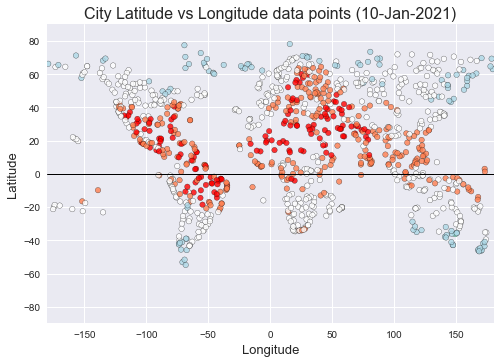

In [152]:
x = weather_data_csv['Longitude'].values
y = weather_data_csv['Latitude'].values
c =  weather_data_csv['color'].values

plt.figure()

mpl.style.use('seaborn')
plt.scatter(x, y, marker="o", c = c, edgecolors="black", alpha=0.80, s = 30)

plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('City Latitude vs Longitude data points (10-Jan-2021)', fontsize=16)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.xlim(-180, 180) 
plt.ylim(-90, 90) 
plt.axhline(0, color='black', lw=1)

plt.show()
#plt.savefig('output/00_Latitude_vs_Longitude_data_points_v2.png', bbox_inches="tight")

plt.close()

### Latitude vs Temperature

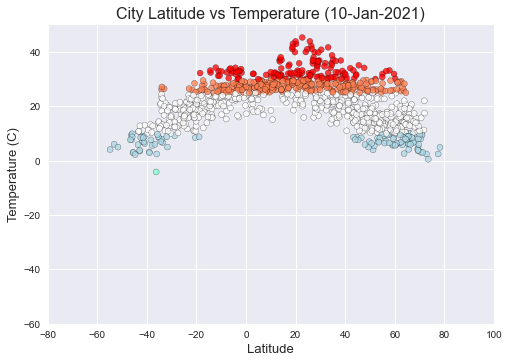

In [153]:
x = weather_data_csv['Latitude'].values
y = weather_data_csv['Temperature'].values
c = weather_data_csv['color'].values

plt.figure()

mpl.style.use('seaborn')
plt.scatter(x, y, marker="o", c = c, edgecolors="black", alpha=0.75, s = 35)

plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('City Latitude vs Temperature (10-Jan-2021)', fontsize=16)
plt.xlabel('Latitude', fontsize=13)
plt.ylabel('Temperature (C)', fontsize=13)
plt.xlim(-80, 100) 
plt.ylim(-60, 50) 

plt.show()
#plt.savefig('output/01_City_Latitude_vs_Temperature_v2.png', bbox_inches="tight")

plt.close()

### Latitude vs Humidity

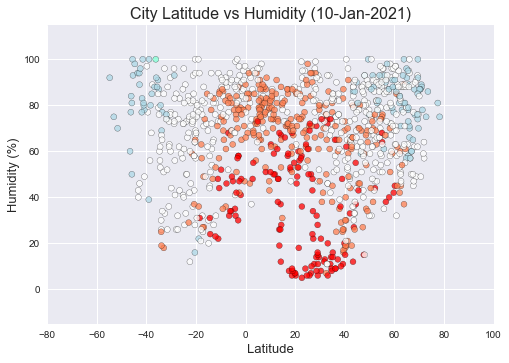

In [154]:
x = weather_data_csv['Latitude'].values
y = weather_data_csv['Humidity'].values
c = weather_data_csv['color'].values


#for i in range(len(y)):
#    if y[i]>100:
#        print(y[i])
        #y[i] = 100

fig = plt.figure()

plt.scatter(x, y, marker="o", c = c, edgecolors="black", alpha=0.75, s = 35)

plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('City Latitude vs Humidity (10-Jan-2021)', fontsize=16)
plt.xlabel('Latitude', fontsize=13)
plt.ylabel('Humidity (%)', fontsize=13)
plt.xlim(-80, 100) 
plt.ylim(-15, 115) 

mpl.style.use('seaborn')

plt.show()
#plt.savefig('output/02_City_Latitude_vs_Humidity_v2.png', bbox_inches="tight")

plt.close()

### Latitude vs Cloudiness

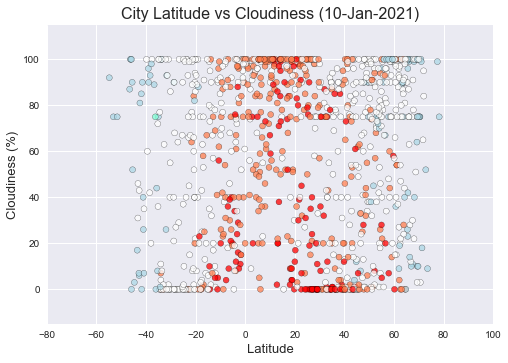

In [155]:
x = weather_data_csv['Latitude'].values
y = weather_data_csv['Clouds'].values
c = weather_data_csv['color'].values


#for i in range(len(y)):
#    if y[i]>100:
#        print(y[i])
        #y[i] = 100

fig = plt.figure()

plt.scatter(x, y, marker="o", c = c, edgecolors="black", alpha=0.75, s = 35)

plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('City Latitude vs Cloudiness (10-Jan-2021)', fontsize=16)
plt.xlabel('Latitude', fontsize=13)
plt.ylabel('Cloudiness (%)', fontsize=13)
plt.xlim(-80, 100) 
plt.ylim(-15, 115) 
mpl.style.use('seaborn')

plt.show()
#plt.savefig('output/03_City_Latitude_vs_Cloudiness_v2.png', bbox_inches="tight")

plt.close()

### Latitude vs Wind Speed

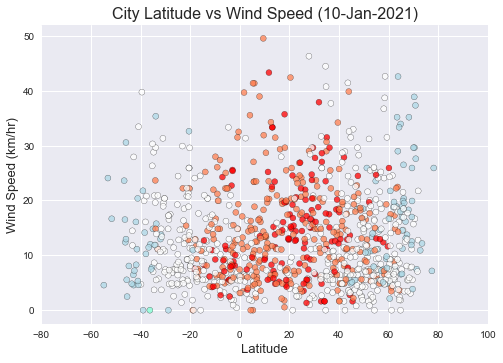

In [156]:
x = weather_data_csv['Latitude'].values
y = weather_data_csv['Wind'].values*3.6
c = weather_data_csv['color'].values

fig = plt.figure()

plt.scatter(x, y, marker="o", c = c, edgecolors="black", alpha=0.75, s = 35)

plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('City Latitude vs Wind Speed (10-Jan-2021)', fontsize=16)
plt.xlabel('Latitude', fontsize=13)
plt.ylabel('Wind Speed (km/hr)', fontsize=13)
plt.xlim(-80, 100) 
#plt.ylim(-3, 50) 

mpl.style.use('seaborn')

plt.show()
#plt.savefig('output/04_City_Latitude_vs_Wind_Speed_v2.png', bbox_inches="tight")

plt.close()
